Data Load

In [1]:
import pandas as pd
from pathlib import Path

path = Path("..")

file_mean = next(path.rglob("LAEI_2019_NA_FILLED_WITH_MEAN.csv"))
dataframe = pd.read_csv(file_mean)

In [2]:
# List of pollutants to plot
pollutants = ['nox', 'n2o', 'pm10', 'pm2.5', 'co2']

grouped_by_year = (
    dataframe[["Year", *pollutants]]
    .groupby(by="Year")
    .sum()
    .reset_index()
)

grouped_by_sector = (
    dataframe[["Sector", *pollutants]]
    .groupby(by="Sector")
    .sum()
    .reset_index()
)


Pollutants by Year

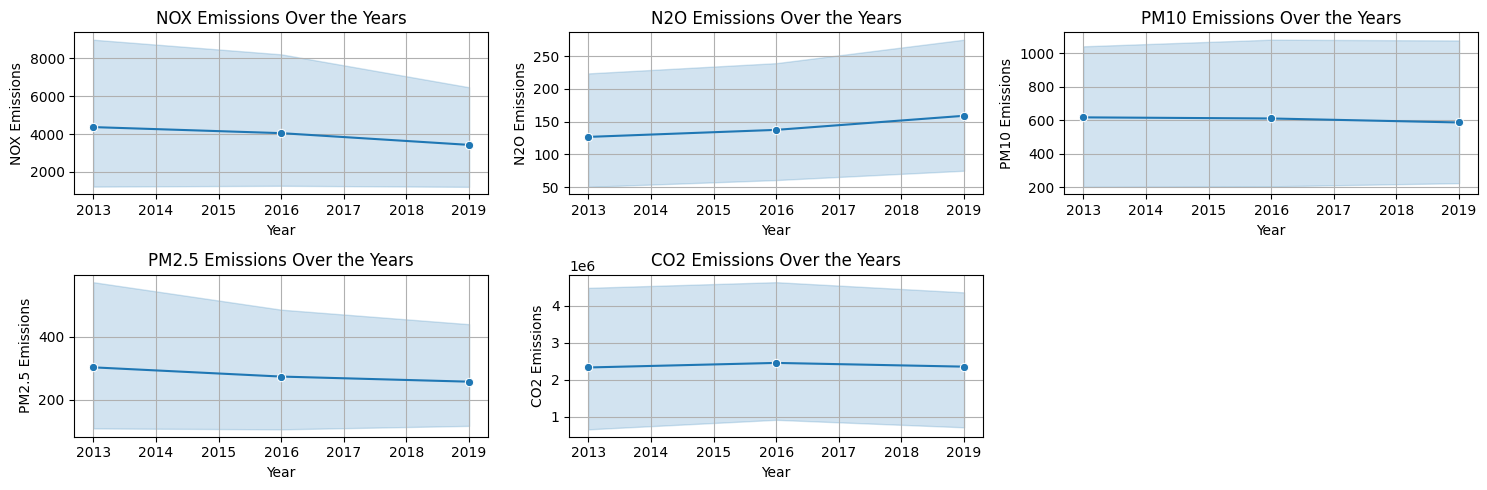

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 5))
axes = axes.flatten() 

# Create individual plots for each pollutant
for i, pollutant in enumerate(pollutants):
    sns.lineplot(data=dataframe, x='Year', y=pollutant, marker='o', ax=axes[i])
    axes[i].set_title(f'{pollutant.upper()} Emissions Over the Years')
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel(f'{pollutant.upper()} Emissions')
    axes[i].grid()

# Remove any empty subplots (if any)
if len(pollutants) < len(axes):
    for j in range(len(pollutants), len(axes)):
        fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

Pollutants by Sector

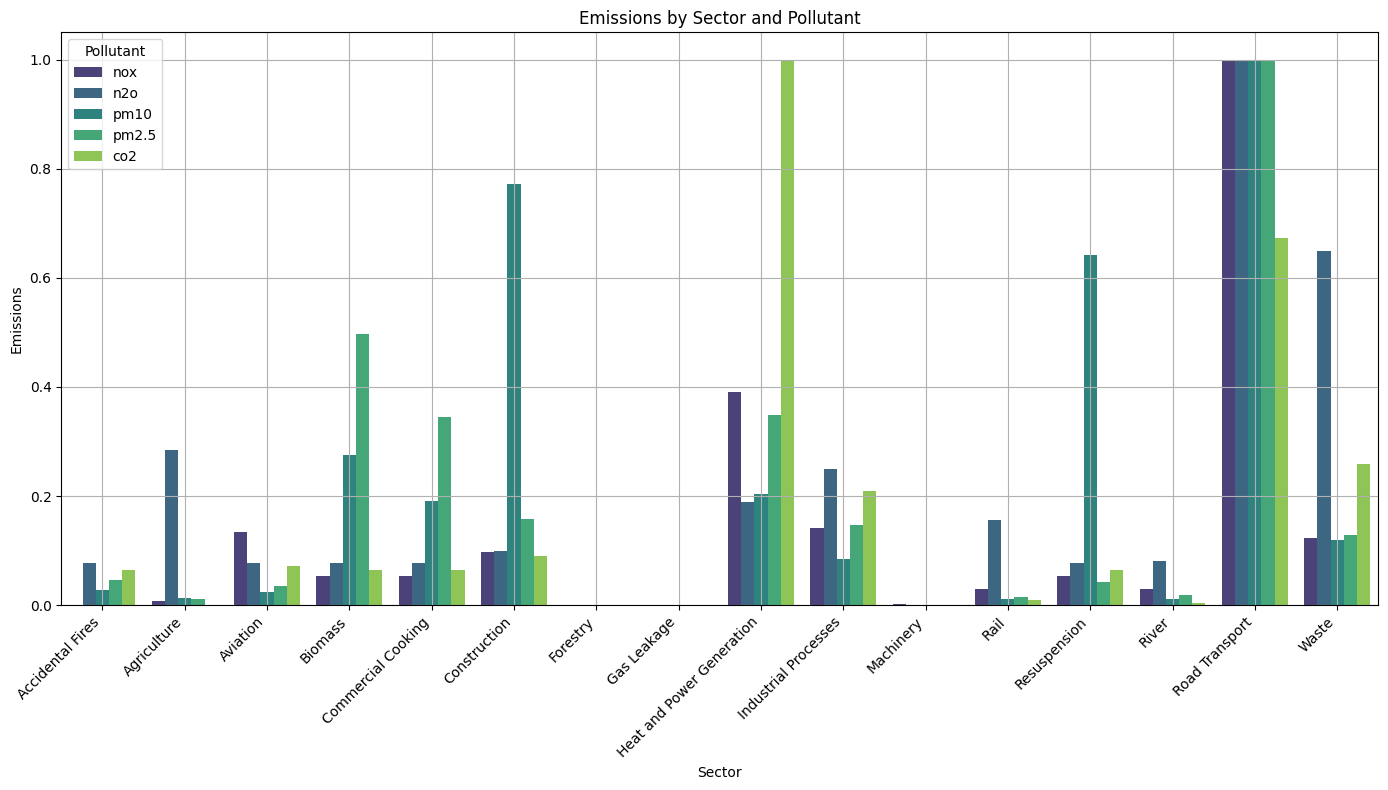

In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
normalized_values = scaler.fit_transform(grouped_by_sector[['nox', 'n2o', 'pm10', 'pm2.5', 'co2']])
normalized_df = pd.DataFrame(normalized_values, columns=['nox', 'n2o', 'pm10', 'pm2.5', 'co2'])
normalized_df['Sector'] = grouped_by_sector['Sector'] 

# Melt the normalized DataFrame to long format for easier plotting
df_melted = normalized_df.melt(id_vars='Sector', 
                                 value_vars=['nox', 'n2o', 'pm10', 'pm2.5', 'co2'],
                                 var_name='Pollutant', 
                                 value_name='Normalized_Emissions')

# Create a bar plot for emissions by sector and pollutant
plt.figure(figsize=(14, 8))
sns.barplot(data=df_melted, x='Sector', y='Normalized_Emissions', hue='Pollutant', palette='viridis')

# Add titles and labels
plt.title('Emissions by Sector and Pollutant')
plt.xlabel('Sector')
plt.ylabel('Emissions')
plt.xticks(rotation=45, ha='right')  # Rotate x labels for better readability
plt.legend(title='Pollutant', loc=2)

# Show the plot
plt.grid()
plt.tight_layout()
plt.show()

Correlation

In [66]:
pollutants_correlation = dataframe[pollutants].corr()

<Axes: >

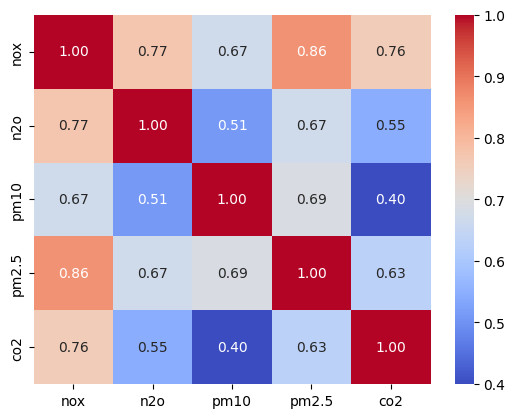

In [68]:
sns.heatmap(pollutants_correlation, annot=True, cmap='coolwarm', fmt=".2f")